### 1. Imports

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.utils import np_utils
from keras.preprocessing import image
%matplotlib inline 

### 2. Load Data

In [2]:
(x_train,y_train),(x_test, y_test) = cifar10.load_data()
NUM_CLASSES = 10
print('Train Data Shape: ',x_train.shape)
print('Train Labels Shape: ',y_train.shape)
print("")
print('Test Data Shape: ',x_test.shape)
print('Test Data Shape: ',y_test.shape)

Train Data Shape:  (50000, 32, 32, 3)
Train Labels Shape:  (50000, 1)

Test Data Shape:  (10000, 32, 32, 3)
Test Data Shape:  (10000, 1)


### 3. Reshape Data

In [3]:
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data
x_train /= 255
x_test /= 255

# Use one-hot encoding on the labels
y_train = np_utils.to_categorical(y_train,NUM_CLASSES)
y_test = np_utils.to_categorical(y_test,NUM_CLASSES)

### 4. Subplot of Example train images

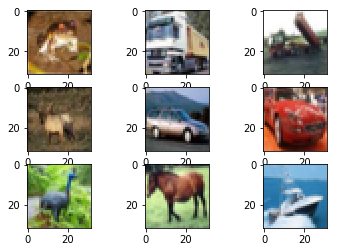

In [4]:
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
# show the plot
plt.show()

### 5. Subplot of Example Test Images

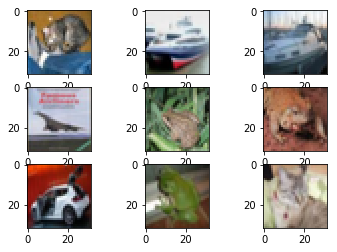

In [5]:
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i])
# show the plot
plt.show()

### 5. Create Deep Neural Network Model

In [114]:
model = Sequential()

model.add(Convolution2D(32, kernel_size = 5, strides = (2,2), padding = 'same', input_shape = (32,32,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = 5, strides = (2,2)))

model.add(Convolution2D(32, kernel_size = 3, strides = (2,2), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 3, strides = (2,2)))
# Dropout(0.3)

model.add(Convolution2D(32, kernel_size = 3, strides = (2,2), padding = 'same'))
# model.add(MaxPooling2D(pool_size = 3, strides = (2,2)))
model.add(Activation('relu'))
# Dropout(0.3)

model.add(Dense(10))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_55 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_56 (Activation)   (None, 3, 3, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 32)          128       
__________

### 6. Compile Model

In [115]:
model.compile(
    loss="categorical_crossentropy",
    optimizer='rmsprop',
    metrics=['accuracy']
)

### 7. Train Model (Fit)

In [116]:
model_info = model.fit(
    x_train, 
    y_train, 
    epochs = 10,
    validation_split = 0.3,
    batch_size = 32
)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 72s 2ms/step - loss: 1.6282 - acc: 0.4069 - val_loss: 1.6408 - val_acc: 0.4083
Epoch 2/10
35000/35000 [==============================] - 73s 2ms/step - loss: 1.3668 - acc: 0.5042 - val_loss: 1.5796 - val_acc: 0.4364
Epoch 3/10
35000/35000 [==============================] - 81s 2ms/step - loss: 1.2701 - acc: 0.5415 - val_loss: 1.5582 - val_acc: 0.4604
Epoch 4/10
35000/35000 [==============================] - 83s 2ms/step - loss: 1.2077 - acc: 0.5663 - val_loss: 1.4495 - val_acc: 0.4687
Epoch 5/10
35000/35000 [==============================] - 81s 2ms/step - loss: 1.1618 - acc: 0.5851 - val_loss: 1.7929 - val_acc: 0.4251
Epoch 6/10
35000/35000 [==============================] - 96s 3ms/step - loss: 1.1291 - acc: 0.5989 - val_loss: 1.3238 - val_acc: 0.5305
Epoch 7/10
35000/35000 [==============================] - 104s 3ms/step - loss: 1.1036 - acc: 0.6130 - val_loss: 1.3010 - val_ac

### 3. Load Image for Prediction

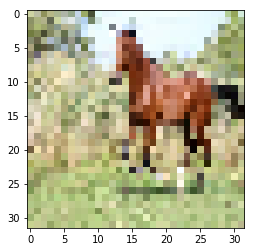

In [105]:

img = image.load_img('test/horse1.jpg', target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)
plt.imshow(img)

In [106]:
loss, metrics = model.evaluate(x_test, y_test, batch_size=32)
print('Model Loss: ', loss)
print('Model Accuracy(%): ', metrics*100.0)

10000/10000 [==============================] - 3s 297us/step
Model Loss:  1.21477080536
Model Accuracy(%):  56.53


### 4. Make prediction

In [107]:
res = model.predict(x)

In [108]:
res

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]], dtype=float32)